
# Objective: Using the file app.csv, develop an 
# outlier detection process.

In [ ]:
# Perform imports here:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from analytic_outlier import OutlierDetection

In [2]:
# Create a pandas DataFrame from app.csv
app = pd.read_csv(r'C:\Users\User\Documents\outlier-1\outlier/app.csv') #path should be changed appropriately

#app.head()

In [ ]:


Q1,Q3 = np.percentile(df, [25,75])

IQR = Q3 - Q1

lcl = Q1 - (1.5 * IQR)

ucl = Q3 + (1.5 * IQR)

# Get outliers
outlier = df[(df < lcl) | (df > ucl)]

# Get inlier
# i.e cells which are not outliers
inlier = df[df >= lcl]
inlier = inlier[inlier <= ucl].dropna()

# Get both outlier and inlier
outlier_and_inlier = df

# Outlier detection with IQR
#what is outlier
#refer to the article or ping me for questions:https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

#there are three risk drivers - ptv,kratio and tico
#there are three segments ade bcd and cde

# Outlier detection process with IQR:

#1. Group new application key risk drivers into monthly subsets based on the date which is the 1st of the month.
#2.For each month calculate the lower control limit and the upper control limit and then determine the set of points which are outside those control limits.
#3.Calulcation should be performed for each key risk driver ,by segment and overall(overall in this case means on the entire month data or for all segments put togather)

#### Function to calculate outliers in a distribution

In [ ]:
outlier = OutlierDetection(app, 'univariate')

In [7]:
#outlier.get_outlier_pvalue(key_drivers=['ptv','kratio','tico'], all_segments=False, method='iqr')

In [5]:
unsegmented = outlier.get_outliers(key_drivers=['ptv','kratio','tico'], all_segments=True, method='iqr')

In [6]:
outliers_alone_segmented, inliers_alone_segmented, outliers_and_inliers_segmented = segmented

In [7]:
outliers_alone_unsegmented, inliers_alone_unsegmented, outliers_and_inliers_unsegmented = unsegmented

In [17]:
#outliers_alone_segmented
#inliers_alone_segmented
#outliers_and_inliers_segmented

#outliers_alone_unsegmented
#inliers_alone_unsegmented
#outliers_and_inliers_unsegmented

In [19]:
len(segmented)

3

# Metric 1 to calculate : Percentage outlier detected by IQR Monthly

### a(i). For each month and key risk driver, ALL segments ,divide the number of outlier with the total number of applications in that subset.

In [14]:
total_all_seg = pd.DataFrame()

for outlier in outliers_alone_segmented:
    #print(outlier)
    #break
    out_count = len(outlier) - outlier.isnull().sum()
    perc_out = (100 * out_count) / len(outlier)
    idx = list(outlier.index.unique())
    sub = pd.DataFrame({'date': idx[0][0], 'seg': "overall", 'key_driver': outlier.columns, 'outlier %': perc_out })
    
    #print(sub)
    #break
    total_all_seg = pd.concat([total_all_seg, sub])

total_all_seg.reset_index(inplace=True)

total_all_seg

,index,date,seg,key_driver,outlier %
0,ptv,5/1/2021,overall,ptv,14.285714
1,ptv,6/1/2021,overall,ptv,0.000000
2,ptv,7/1/2021,overall,ptv,0.000000
3,ptv,8/1/2021,overall,ptv,0.000000
4,ptv,5/1/2021,overall,ptv,0.000000
5,ptv,6/1/2021,overall,ptv,0.000000
6,ptv,7/1/2021,overall,ptv,0.000000
7,ptv,8/1/2021,overall,ptv,0.000000
8,ptv,5/1/2021,overall,ptv,0.000000
9,ptv,6/1/2021,overall,ptv,0.000000


### a(ii). For each month and key risk driver and segment ,divide the number of outlier with the total number of applications in that subset.

In [8]:
total = pd.DataFrame()
for outlier in outliers_alone_segmented:
    #print(outlier)
    out_count = len(outlier) - outlier.isnull().sum()
    perc_out = (100 * out_count) / len(outlier)
    idx = list(outlier.index.unique())

    sub = pd.DataFrame({'date': idx[0][0], 'seg': idx[0][1], 'key_driver': outlier.columns, 'outlier %': perc_out })
    
    #print(sub)
    #break
    total = pd.concat([total, sub])

total.reset_index(inplace=True)
#total

NameError: name 'outliers_alone_segmented' is not defined

### Merge outliers for overall segment and outliers for segmented distribution

In [37]:
merged_outliers = pd.concat([total, total_all_seg])

#merged_outliers

### b(i). Plot the monthly outlier rate in a line chart by segment and overall.

,outlier %
key_driver,
kratio,105.042017
ptv,0.000000
tico,14.285714


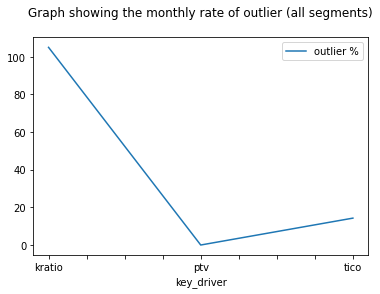

In [38]:
total_all_seg.groupby(['key_driver']).sum().plot(kind='line');
#total_all_seg.plot(kind='line');

#plt.ylabel("outlier rate (%)")
#plt.xlabel("date (month)")
plt.title("Graph showing the monthly rate of outlier (all segments)\n")
total_all_seg.groupby(['key_driver']).sum()

### b(ii). Plot the monthly outlier rate in a line chart by segment and overall.

,outlier %
key_driver,
kratio,96.709957
ptv,14.285714
tico,51.948052


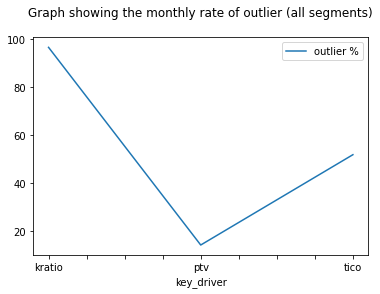

In [39]:
total.groupby(['key_driver']).sum().plot(kind='line');
#total.plot(kind='line');

#plt.ylabel("outlier rate (%)")
#plt.xlabel("date (month)")
plt.title("Graph showing the monthly rate of outlier (all segments)\n")
total.groupby(['key_driver']).sum()

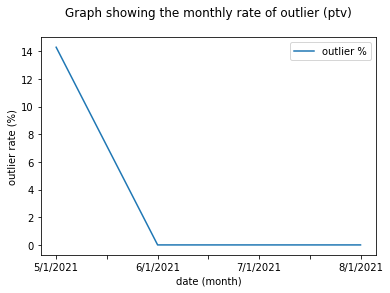

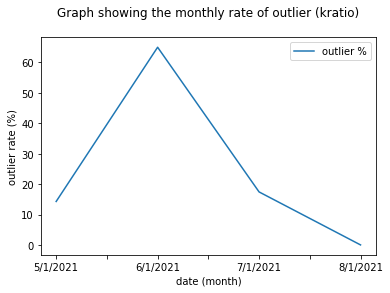

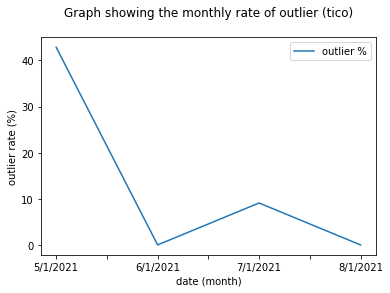

In [40]:
for key_driver in list(total['key_driver'].unique()):
    total[total['key_driver'] == key_driver].groupby(['date']).sum().plot(kind='line');
    plt.ylabel("outlier rate (%)")
    plt.xlabel("date (month)")
    plt.title(f"Graph showing the monthly rate of outlier ({key_driver})\n")

# Metric 2 T Test differential between the monthly sample with and without outliers.

### 1(a). For each month and key risk driver - all segments ,calculate the sample means on the full distribution and the distribution excluding outliers.

In [42]:
full_dists_mean_all_seg = []
outlier_less_mean_all_seg = []
all_seg_m_segs = []
all_seg_m_dates = []
all_seg_m_key_drivers = []

for idx, _ in enumerate(outliers_and_inliers_unsegmented):
    group_mean_all_seg1 = (list(outliers_and_inliers_unsegmented[idx].iloc[:, -1]))
    group_mean_all_seg2 = (list(inliers_alone_unsegmented[idx].iloc[:, -1]))
    
    #print(group_mean_all_seg1, group_mean_all_seg2)
    
    idn = list(outliers_and_inliers_unsegmented[idx].index.unique())
    #print(idn)
    #break

    all_seg_m_segs.append(idn[0][1])
    
    # Selecting each key driver
    #print(list(with_outliers_all_seg[idx].columns)[0])
    #break
    all_seg_m_key_drivers.append(list(outliers_and_inliers_unsegmented[idx].columns)[0])
    all_seg_m_dates.append(idn[0][0])
    full_dists_mean_all_seg.append(np.mean(group_mean_all_seg1))
    outlier_less_mean_all_seg.append(np.mean(group_mean_all_seg2))
    
dist_mean_all_seg = pd.DataFrame({"date": all_seg_m_dates, "seg": 'overall', "key_driver": all_seg_m_key_drivers, "x for full dist": full_dists_mean_all_seg, "x for outlierless mean": outlier_less_mean_all_seg})
dist_mean_all_seg

,date,seg,key_driver,x for full dist,x for outlierless mean
0,5/1/2021,overall,ptv,0.761714,0.761714
1,6/1/2021,overall,ptv,1.236429,1.236429
2,7/1/2021,overall,ptv,1.405000,1.405000
3,8/1/2021,overall,ptv,0.838333,0.838333
4,5/1/2021,overall,ptv,0.761714,0.761714
5,6/1/2021,overall,ptv,1.236429,1.236429
6,7/1/2021,overall,ptv,1.405000,1.405000
7,8/1/2021,overall,ptv,0.838333,0.838333
8,5/1/2021,overall,ptv,0.761714,0.761714
9,6/1/2021,overall,ptv,1.236429,1.236429


### 1(b). For each month and key risk driver - each segment,calculate the sample means on the full distribution and the distribution excluding outliers.

In [44]:
full_dists_mean = []
outlier_less_mean = []
m_dates = []
m_segs = []
m_key_drivers = []
for idx, _ in enumerate(outliers_alone_segmented):
    group_mean1 = (list(outliers_alone_segmented[idx].iloc[:, -1]))
    group_mean2 = (list(inliers_alone_segmented[idx].iloc[:, -1]))
    
    #print(group_mean1, group_mean2)
    
    idn = list(outliers_alone_segmented[idx].index.unique())

    m_dates.append(idn[0][0])
    m_segs.append(idn[0][1])
    m_key_drivers.append(list(outliers_and_inliers_segmented[idx].columns)[0])
    full_dists_mean.append(np.mean(group_mean1))
    outlier_less_mean.append(np.mean(group_mean2))
    
dist_mean = pd.DataFrame({"date": m_dates, "seg": m_segs, "key_driver": m_key_drivers, "x for full dist": full_dists_mean, "x for outlierless mean": outlier_less_mean})
#dist_mean

### Merge mean distribution for overall and segmented data

In [45]:
merged_dist_mean = pd.concat([dist_mean, dist_mean_all_seg])

#merged_dist_mean

### 2(a). Compute two sample t test for the difference between the full and outlier less means - all segments.Store the p values.

In [58]:
pvalues_all_seg = []
dates_all_seg = []
key_drivers_all_seg = []
for idx, _ in enumerate(outliers_and_inliers_unsegmented):
    # idx is an index, starting from zero
    
    # Getting list of distribution for outlier dist and outlierless dist
    group_ttest1_all_seg = (list(inliers_alone_segmented[idx].iloc[:, -1]))
    group_ttest2_all_seg = (list(outliers_and_inliers_segmented[idx].iloc[:, -1]))
    
    print(group_ttest1_all_seg) # 1st iter - [0.87, 0.56, 0.26, 0.91, 0.94, 0.97, 1.05], uncomment to see what this prints
    print(group_ttest2_all_seg) # 1st iter - [0.87, 0.56, 0.91, 0.94, 0.97, 1.05] uncomment to see what this prints
    break
    
    
    idn = list(inliers_alone_unsegmented[idx].index.unique())
    
    #print(f"({idn[0][0]} - {idn[0][1]} - {list(with_outliers_all_seg[idx].columns)[0]})")
    
    # stats.ttest_ind() has one argument 'equal_var' which can either be True or False
    # It is true when highest variance (in the variences of the two groups) divide by
    # lowest variance (in the variences of the two groups) is less than 4
    # otherwise, it is False
    if max(np.var(group_ttest1_all_seg), np.var(group_ttest2_all_seg))/min(np.var(group_ttest1_all_seg), np.var(group_ttest2_all_seg)) < 4:
        equal_var = True
    else:
        equal_var = False

    # 
    stat, pvalue_all_seg = stats.ttest_ind(a=group_ttest1_all_seg, b=group_ttest2_all_seg, equal_var=equal_var)
    
    pvalues_all_seg.append(pvalue_all_seg)
    dates_all_seg.append(idn[0][0])
    
    key_drivers_all_seg.append(list(inliers_alone_unsegmented[idx].columns)[0])
    
df_pvalues_all_seg = pd.DataFrame({"pvalue": pvalues_all_seg, "date": dates_all_seg, "seg": "overall", "key_driver": key_drivers_all_seg})

df_pvalues_all_seg

[0.87, 0.56, nan, 0.91, 0.94, 0.97, 1.05]
[0.87, 0.56, 0.26, 0.91, 0.94, 0.97, 1.05]


,pvalue,date,seg,key_driver


### 2(b). Compute two sample t test for the difference between the full and outlier less means - segmented dist. Store the p values.

In [19]:
pvalues = []
dates = []
segs = []
key_drivers = []
for idx, _ in enumerate(with_outliers):
    # idx is an index, starting from zero
    
    # Getting list of distribution for outlier dist and outlierless dist
    group_ttest1 = (list(with_outliers[idx].iloc[:, -1]))
    group_ttest2 = (list(without_outliers[idx].iloc[:, -1]))
    
    #print(group_ttest1) # 1st iter - [0.87, 0.56, 0.26, 0.91, 0.94, 0.97, 1.05], uncomment to see what this prints
    #print(group_ttest2) # 1st iter - [0.87, 0.56, 0.91, 0.94, 0.97, 1.05] uncomment to see what this prints
    #break
    
    
    idn = list(with_outliers[idx].index.unique())
    
    #print(f"({idn[0][0]} - {idn[0][1]} - {list(with_outliers[idx].columns)[0]})")
    
    # stats.ttest_ind() has one argument 'equal_var' which can either be True or False
    # It is true when highest variance (in the variences of the two groups) divide by
    # lowest variance (in the variences of the two groups) is less than 4
    # otherwise, it is False
    if max(np.var(group_ttest1), np.var(group_ttest2))/min(np.var(group_ttest1), np.var(group_ttest2)) < 4:
        equal_var = True
    else:
        equal_var = False

    # 
    stat, pvalue = stats.ttest_ind(a=group_ttest1, b=group_ttest2, equal_var=equal_var)
    
    pvalues.append(pvalue)
    dates.append(idn[0][0])
    segs.append(idn[0][1])
    key_drivers.append(list(with_outliers[idx].columns)[0])
    
df_pvalues = pd.DataFrame({"pvalue": pvalues, "date": dates, "seg": segs, "key_driver": key_drivers})

#df_pvalues

### Merge pvalues distribution for overall and segmented data

In [20]:
merged_df_pvalues = pd.concat([df_pvalues, df_pvalues_all_seg])

#merged_df_pvalues

# Interpreting and Reporting the Pvalues

From the pvalues table for all category, pvalue equal to exactly 1.000 means that the two groups being compared have the same mean (or the two groups are identical). This happens when there is no outlier in that segment/month/key_driver as distribution for 'with_outliers' and 'without_outliers' will be exactly the same

Pvalues is a value between 0 and 1 (0 and 1 not included). 

A value closer to 0 (zero), especially when it is less than 0.05 significance level indicates that we should reject null hypothesis - accept alternate hypothesis (assumption that there IS relationship between two groups being studied, one variable AFFECTS another). 

A value tending towards 1 (one) shows that there is a strong reason to fail to reject (accept, accept should not be used though) null hypothesis (assumption that there is NO relationship between two groups being studied, one variable DOES NOT affect another)

# 3. Create a heat map comparing the p values of the difference in means for full and outlier less distributions.
#i. if p<1 ,yellow
#ii. if p<.5,
#iii. else green

In [21]:
ct = pd.crosstab(df_pvalues['date'], df_pvalues['pvalue'], margins=False)

df_pvalues_grouped = df_pvalues.groupby(['seg', 'date']).mean()
df_pvalues_grouped = df_pvalues_grouped.unstack(level=0)

df_pvalues_grouped

pvalue                    
seg            ade       bcd       cde
date                                  
5/1/2021  0.672119  0.631875  0.840280
6/1/2021  0.798901  0.796690  0.804676
7/1/2021  0.825588  0.865079  0.819892
8/1/2021  1.000000  1.000000  1.000000

Text(0.5, 1.0, 'P-values comparison for each month/segment\n')

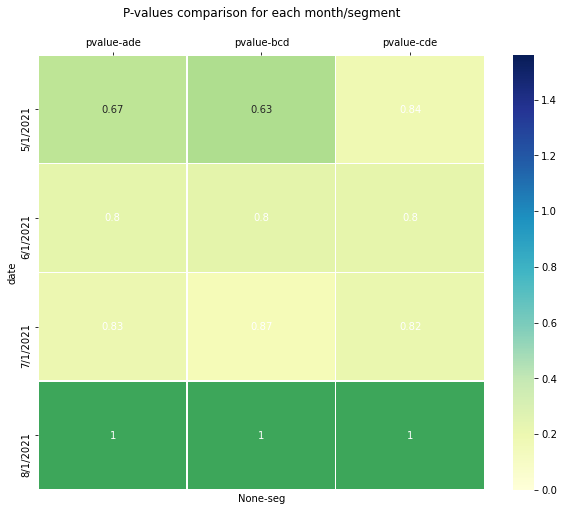

In [22]:
fig, ax = plt.subplots(figsize=(10, 8));

sns.heatmap(df_pvalues_grouped, cmap="YlGnBu", annot=True, vmin=0, linewidth=0.2, vmax=1.56, cbar=True);
sns.heatmap(df_pvalues_grouped, mask=df_pvalues_grouped >= 5, cmap="Greens", annot=False, vmin=0, linewidth=0.2, vmax=1.56, cbar=False);
sns.heatmap(df_pvalues_grouped, mask=df_pvalues_grouped >= 1, cmap="YlGn_r", annot=False, vmin=0, linewidth=0.2, vmax=1, cbar=False);

ax.xaxis.tick_top()
plt.title("P-values comparison for each month/segment\n")

In [81]:
temp = app.copy()
del app['seg']
del app['date']
del app['ptv']
del app['id']

In [82]:
fh = dict()
fh['id'] = range(123, 50123)
for col in app.columns:
    fh[col] = np.random.randint(app[col].min(), app[col].max(), 50000)
fh['ptv'] = np.random.uniform(low=temp.ptv.min(), high=temp.ptv.max(), size=(50000))

In [83]:
date = (list(temp.date.values) * 506)[:50000]

date.sort()

In [84]:
fh['seg'] = np.random.choice(temp.seg.unique(), 50000)
fh['date'] = date

In [85]:
app_dummy = pd.DataFrame(fh)

In [86]:
app_dummy.sort_values('id')

,id,kratio,tico,score,ptv,seg,date
0,123,641,556,385,0.192065,bcd,5/1/2021
1,124,475,622,348,0.513020,cde,5/1/2021
2,125,594,575,373,1.625228,cde,5/1/2021
3,126,468,548,475,1.356672,ade,5/1/2021
4,127,511,627,660,0.284799,bcd,5/1/2021
...,...,...,...,...,...,...,...
49995,50118,762,561,506,1.503808,ade,8/1/2021
49996,50119,653,534,606,1.076223,bcd,8/1/2021
49997,50120,576,633,487,1.991187,bcd,8/1/2021
49998,50121,741,464,575,1.414041,ade,8/1/2021


In [87]:
app_dummy.to_csv('app_dummy.csv')